<a href="https://colab.research.google.com/github/SulpisiusBernikustiMentik/094_Sulpisius-Bernikusti-Mentik_Posttest2_Data-Mining/blob/main/094_Sulpisius_Bernikusti_Mentik_Posttest_2_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Posttest 2 Data Mining

Nama : Sulpisius Bernikusti Mentik


NIM : 2109116094

Kelas : C 2021

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("dataset_market_basket.csv")

In [ ]:
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 1 item set
df.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     whole milk  pasrty  salty snack  sausage  semi-finished bread  yogurt  \
0            1       1            1        0                    0       0   
1            1       0            0        1                    1       1   
2            0       0            0        0                    0       0   
3            0       0            0        0                    0       0   
4            0       0            0        1                    0       0   
5            1       0            0        1                    0       0   
6            1       0            0        0                    0       0   
7            0       0            0        0                    0       0   
8            0       0            0        0                    0       0   
9            0       0            0        0                    0       0   
10           1       0            0        0                    0       0   
11           0

In [ ]:
#Item pada kolom
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [ ]:
from itertools import permutations

list_item = list(permutations(df.columns, 2))
list_item

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [ ]:
list_kombinasi = []
for i in list_item:

#memfilter dengan nama kolom
  if len(df[(df[i[0]]==1)]) >0:
    list_kombinasi.append(i)
list_kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [ ]:
hitung = {}

for i in list_kombinasi:
  len_data= len(df[
      (df[i[0]]==1) & (df[i[1]]==1)
  ])
  hitung[str(i)] = len_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'pickled vegetables')": 0,
 "('whole milk', 'canned beer')": 0,
 "('whole milk', 'misc. beverages')": 0,
 "('whole milk', 'hygiene articles')": 0,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'frankfurter')": 0,
 "('whole milk', 'whipped/sour cream')": 0,
 "('whole milk', 'curd')": 0,
 "('whole milk', 'beef')": 0,
 "('whole milk', 'white bread')": 0,
 "('whole milk', 'butter')": 1,
 "('whole milk', 'frozen vegetables')": 0,
 "('whole milk', 'other vegetables')": 0,
 "('whole milk', 'tropical fruit')": 0,
 "('whole milk', 'sugar')": 0,
 "('whole milk', 'butter milk')": 0,
 "('whole milk', 'specialty chocolate')": 0,
 "('whole milk', 'frozen meals')": 0,
 "('whole milk', 'dental care')": 0,
 "('whole milk', 'root vegetables')": 0,
 "('whole milk', 'detergent

In [ ]:
supp = [i/len(df)*100 for i in hitung.values()]

for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

('whole milk', 'pasrty') support = 5%
('whole milk', 'salty snack') support = 5%
('whole milk', 'sausage') support = 11%
('whole milk', 'semi-finished bread') support = 5%
('whole milk', 'yogurt') support = 5%
('whole milk', 'soda') support = 5%
('whole milk', 'pickled vegetables') support = 0%
('whole milk', 'canned beer') support = 0%
('whole milk', 'misc. beverages') support = 0%
('whole milk', 'hygiene articles') support = 0%
('whole milk', 'rolls/buns') support = 5%
('whole milk', 'frankfurter') support = 0%
('whole milk', 'whipped/sour cream') support = 0%
('whole milk', 'curd') support = 0%
('whole milk', 'beef') support = 0%
('whole milk', 'white bread') support = 0%
('whole milk', 'butter') support = 5%
('whole milk', 'frozen vegetables') support = 0%
('whole milk', 'other vegetables') support = 0%
('whole milk', 'tropical fruit') support = 0%
('whole milk', 'sugar') support = 0%
('whole milk', 'butter milk') support = 0%
('whole milk', 'specialty chocolate') support = 0%
('wh

In [ ]:
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->pickled vegetables Confidence = 0.0%
whole milk->canned beer Confidence = 0.0%
whole milk->misc. beverages Confidence = 0.0%
whole milk->hygiene articles Confidence = 0.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->frankfurter Confidence = 0.0%
whole milk->whipped/sour cream Confidence = 0.0%
whole milk->curd Confidence = 0.0%
whole milk->beef Confidence = 0.0%
whole milk->white bread Confidence = 0.0%
whole milk->butter Confidence = 20.0%
whole milk->frozen vegetables Confidence = 0.0%
whole milk->other vegetables Confidence = 0.0%
whole milk->tropical fruit Confidence = 0.0%
whole milk->sugar Confidence = 0.0%
whole milk->butter milk Confidence = 0.0%
whole milk->specialty chocolate Confidence = 0.0%
whole milk->frozen m

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

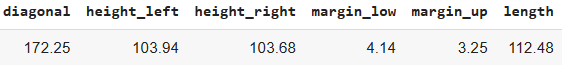
<!-- 1412 -->

In [ ]:
df = pd.read_csv("deteksi_uang_palsu.csv")

In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

import pandas as pd 
import numpy as np

df = pd.read_csv("deteksi_uang_palsu.csv")

# memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

# Menyimpan hasil ke file CSV
df.to_csv('hasil_jarak.csv', index=False)

df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('sorted.csv', index=False)

# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak yang adalah", label_counts.idxmax())

Label terbanyak yang adalah True


# (3) Analisis

> Nama : Sulpisius Bernikusti Mentik

> Nim : 2109116094


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

### Business Understanding
Pada tahap ini, kita akan memahami tujuan dari analisis dan bisnis yang terkait dengan dataset. Sebagai contoh, kita akan menggunakan dataset NSE_BANKING_SECTOR.csv yang mengukur kinerja pasar saham di india

### Data Understanding


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px

df3 = pd.read_csv("NSE_BANKING_SECTOR.csv") #membaca dataframe

In [ ]:
df3.head() #untuk menampilkan lima baris pertama dari suatu dataframe.

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586


In [ ]:
df3

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [ ]:
df3.info() #menampilkan detail data dari dataframe df3 yang terdiri jumlah baris dan kolom, jumlah nilai non-null, type data setiap kolom, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  float64
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   CLOSE               41231 non-null  float64
 9   VWAP                41231 non-null  float64
 10  VOLUME              41231 non-null  int64  
 11  TURNOVER            41231 non-null  float64
 12  TRADES              41231 non-null  int64  
 13  DELIVERABLE VOLUME  41231 non-null  int64  
 14  %DELIVERBLE         41231 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.7+

In [ ]:
df3.describe() #menampilkan count, mean, std, min, kuartil bawah(25%), median(50%), kuartil atas(75%), dan nilai maximum untuk setiap kolom numerik dalam dataframe.

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
count,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,41231.000000
mean,291.962753,292.350947,296.518484,287.723448,291.993606,292.013088,292.160731,1.042650e+07,1.953615e+14,5.221812e+04,3.026935e+06,0.415416
std,452.541028,452.967892,458.224757,447.069432,452.717343,452.732064,452.655314,2.953972e+07,4.038675e+14,8.851021e+04,9.387528e+06,0.196122
min,4.900000,4.950000,4.950000,4.800000,4.900000,4.900000,4.910000,9.194000e+03,1.681628e+10,9.400000e+01,7.392000e+03,0.020100
25%,37.150000,37.300000,37.975000,36.450000,37.100000,37.100000,37.230000,8.216770e+05,5.730684e+12,5.398000e+03,3.457530e+05,0.252700
50%,101.900000,102.000000,103.800000,99.800000,101.750000,101.850000,102.020000,2.777826e+06,4.025961e+13,1.928000e+04,9.584380e+05,0.414700
75%,305.675000,306.125000,311.400000,301.050000,305.775000,305.675000,306.280000,9.769572e+06,2.041632e+14,6.297200e+04,2.928749e+06,0.563200
max,2860.450000,2871.000000,2896.000000,2838.000000,2861.550000,2860.450000,2867.920000,1.264918e+09,1.498222e+16,1.788274e+06,7.870864e+08,1.000000


<Axes: xlabel='VOLUME', ylabel='count'>

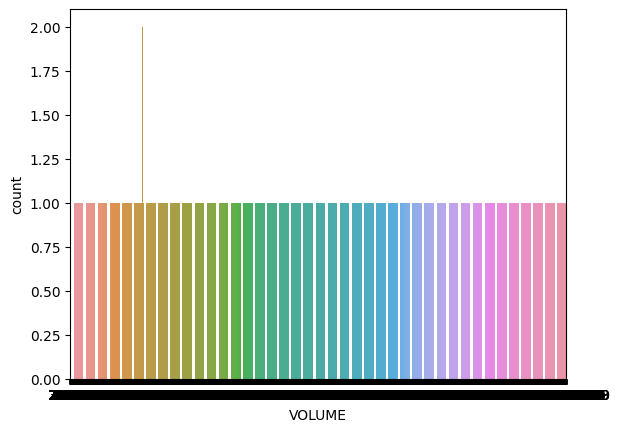

In [ ]:
sns.countplot(x="VOLUME", data=df3)

<Axes: xlabel='HIGH', ylabel='count'>

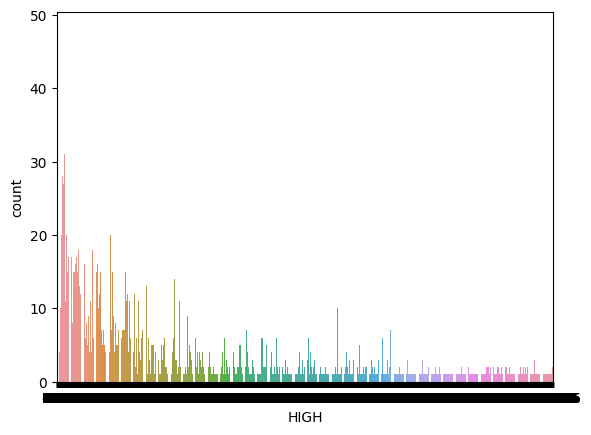

In [ ]:
sns.countplot(x="HIGH", data=df3)

<Axes: xlabel='TRADES', ylabel='count'>

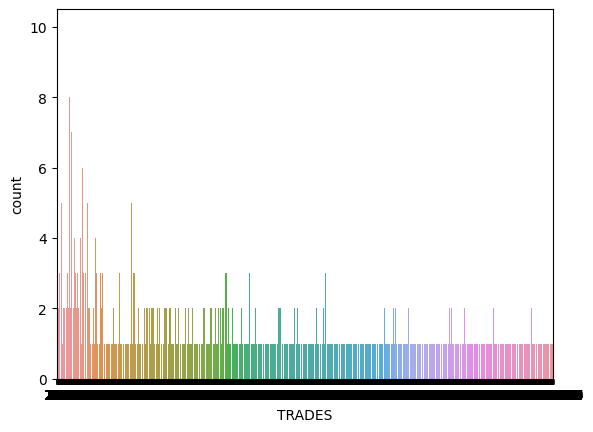

In [ ]:
sns.countplot(x="TRADES", data=df3)

<Axes: xlabel='HIGH', ylabel='Count'>

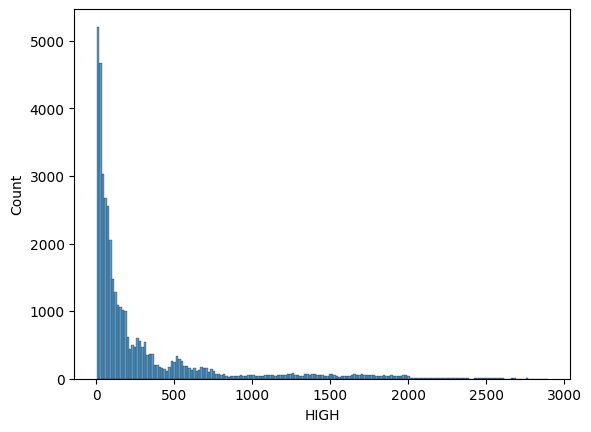

In [ ]:
sns.histplot(data=df3,x= "HIGH") #Histogram harga tertinggi

<Axes: xlabel='PREV CLOSE'>

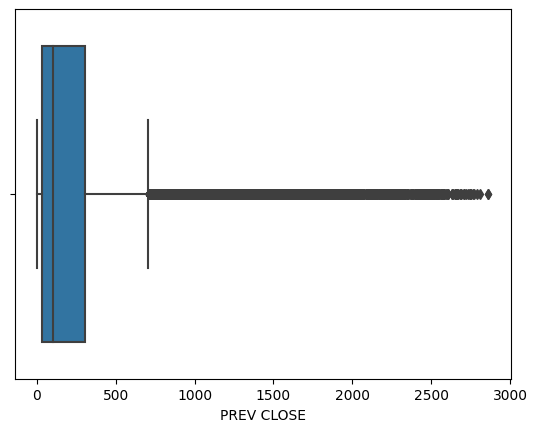

In [ ]:
sns.boxplot(x="PREV CLOSE", data=df3) #Boxplot penutupan harga

<Axes: xlabel='HIGH', ylabel='PREV CLOSE'>

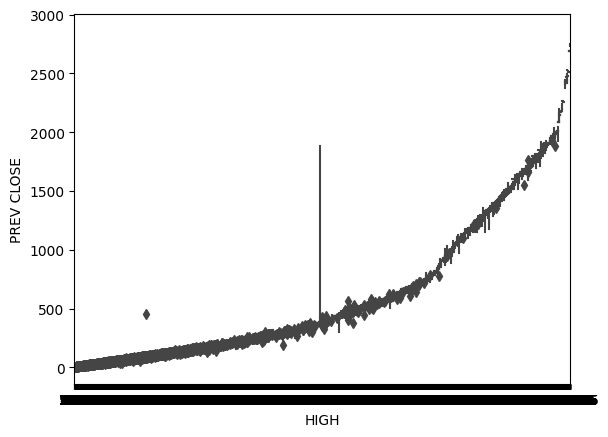

In [ ]:
sns.boxplot(x="HIGH", y="PREV CLOSE", data=df3)

<Axes: xlabel='PREV CLOSE', ylabel='HIGH'>

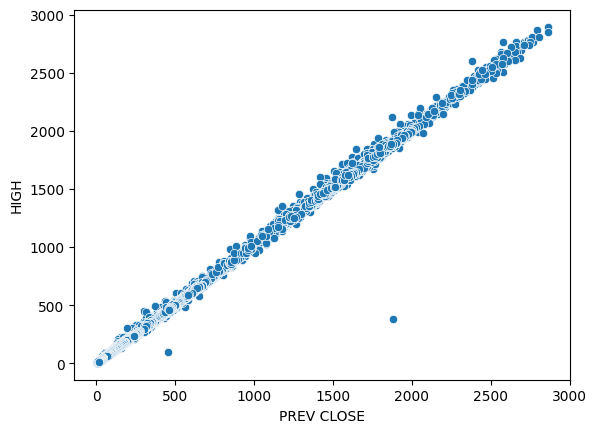

In [ ]:
sns.scatterplot(data=df3, x="PREV CLOSE", y="HIGH")

### Data Preparation

In [ ]:
cols_no_na = df3.columns[df3.isna().sum(axis=0) == 0]
cols_with_na = df3.columns[df3.isna().sum(axis=0) > 0]

print("Columns with no missing value:", cols_no_na)
print("Columns with missing values:", cols_with_na)

Columns with no missing value: Index(['DATE', 'SYMBOL', 'SERIES', 'PREV CLOSE', 'OPEN', 'HIGH', 'LOW', 'LAST',
       'CLOSE', 'VWAP', 'VOLUME', 'TURNOVER', 'TRADES', 'DELIVERABLE VOLUME',
       '%DELIVERBLE'],
      dtype='object')
Columns with missing values: Index([], dtype='object')


In [ ]:
df3[df3.isna().sum(axis=1) > 0] #Mengambil subset dari dataframe yang hanya berisi baris-baris yang memiliki satu nilai yang hilang.

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE


In [ ]:
import pandas as pd

Select Data

In [ ]:
# Read data from CSV file
df = pd.read_csv('NSE_BANKING_SECTOR.csv')

In [ ]:
# Menampilkan semua kolom dari data
print(df)

             DATE    SYMBOL SERIES  PREV CLOSE     OPEN     HIGH      LOW  \
0      2016-01-01      HDFC     EQ     1263.75  1261.00  1266.90  1250.65   
1      2016-01-04      HDFC     EQ     1258.45  1250.00  1253.90  1212.05   
2      2016-01-05      HDFC     EQ     1216.70  1229.90  1233.45  1206.50   
3      2016-01-06      HDFC     EQ     1209.40  1209.60  1220.75  1202.40   
4      2016-01-07      HDFC     EQ     1209.30  1198.85  1203.55  1175.00   
...           ...       ...    ...         ...      ...      ...      ...   
41226  2021-05-24  DHANBANK     EQ       14.30    14.40    14.70    14.35   
41227  2021-05-25  DHANBANK     EQ       14.55    14.60    17.45    14.40   
41228  2021-05-26  DHANBANK     EQ       16.60    16.75    16.75    15.80   
41229  2021-05-27  DHANBANK     EQ       15.95    15.95    16.10    15.35   
41230  2021-05-28  DHANBANK     EQ       15.60    15.60    15.80    14.90   

          LAST    CLOSE     VWAP    VOLUME      TURNOVER  TRADES  \
0      

In [ ]:
# Menampilkan data dengan kolom tertentu
# Membuat hanya menampikan 4 Kolom
selected_data = df[['SYMBOL', 'DATE']]

# Menampilkan Perintah
print(selected_data.head())



  SYMBOL        DATE
0   HDFC  2016-01-01
1   HDFC  2016-01-04
2   HDFC  2016-01-05
3   HDFC  2016-01-06
4   HDFC  2016-01-07


In [ ]:
# Menampilkan data saham ICICI Bank
print(df[df['SYMBOL'] == 'ICICIBANK'])

            DATE     SYMBOL SERIES  PREV CLOSE    OPEN    HIGH     LOW  \
1337  2016-01-01  ICICIBANK     EQ      261.35  261.30  263.60  258.00   
1338  2016-01-04  ICICIBANK     EQ      263.00  261.00  261.35  254.65   
1339  2016-01-05  ICICIBANK     EQ      255.55  256.25  257.50  251.70   
1340  2016-01-06  ICICIBANK     EQ      256.70  255.40  256.75  249.20   
1341  2016-01-07  ICICIBANK     EQ      250.10  246.40  247.70  243.10   
...          ...        ...    ...         ...     ...     ...     ...   
2669  2021-05-24  ICICIBANK     EQ      642.45  643.25  653.45  638.00   
2670  2021-05-25  ICICIBANK     EQ      647.35  650.10  652.00  642.50   
2671  2021-05-26  ICICIBANK     EQ      650.30  649.35  656.65  643.30   
2672  2021-05-27  ICICIBANK     EQ      652.50  651.10  656.50  648.10   
2673  2021-05-28  ICICIBANK     EQ      652.25  658.05  660.00  639.25   

        LAST   CLOSE    VWAP    VOLUME      TURNOVER  TRADES  \
1337  262.55  263.00  261.32   5452815  1.42492

In [ ]:
# Menampilkan data dengan tanggal tertentu
print(df[df['DATE'] == '2019-01-02'])

             DATE      SYMBOL SERIES  PREV CLOSE     OPEN     HIGH      LOW  \
742    2019-01-02        HDFC     EQ     2009.00  2004.70  2009.00  1961.00   
2079   2019-01-02   ICICIBANK     EQ      363.75   361.50   367.90   360.30   
3416   2019-01-02        SBIN     EQ      299.60   299.10   302.50   293.10   
4753   2019-01-02   KOTAKBANK     EQ     1250.45  1247.90  1248.25  1227.00   
6090   2019-01-02    AXISBANK     EQ      627.30   623.00   628.50   617.50   
7427   2019-01-02  INDUSINDBK     EQ     1595.60  1587.60  1598.00  1568.25   
8211   2019-01-02  BANDHANBNK     EQ      556.70   553.00   563.70   549.60   
9548   2019-01-02         PNB     EQ       79.80    79.55    80.40    77.30   
10885  2019-01-02  BANKBARODA     EQ      123.30   123.50   124.45   118.20   
12222  2019-01-02        IDBI     EQ       61.45    61.40    61.50    61.25   
13559  2019-01-02    IDFCBANK     EQ       43.35    43.20    43.60    42.20   
14896  2019-01-02     YESBANK     EQ      184.25   1

Clean Data

In [ ]:
# Read data from CSV file
df = pd.read_csv('NSE_BANKING_SECTOR.csv')

# Drop unnecessary columns
df = df.drop(['DATE', 'SERIES', 'LAST', 'VWAP', 'TRADES'], axis=1)

# Rename columns
df = df.rename(columns={'SYMBOL': 'stock_name', 'OPEN': 'open_price'})

# Drop rows with missing values
df = df.dropna()

# Display the cleaned data
print(df.head())

  stock_name  PREV CLOSE  open_price     HIGH      LOW    CLOSE   VOLUME  \
0       HDFC     1263.75     1261.00  1266.90  1250.65  1258.45   676161   
1       HDFC     1258.45     1250.00  1253.90  1212.05  1216.70  1995329   
2       HDFC     1216.70     1229.90  1233.45  1206.50  1209.40  2325929   
3       HDFC     1209.40     1209.60  1220.75  1202.40  1209.30  2746330   
4       HDFC     1209.30     1198.85  1203.55  1175.00  1179.45  1780298   

       TURNOVER  DELIVERABLE VOLUME  %DELIVERBLE  
0  8.508751e+13              308262       0.4559  
1  2.449371e+14             1360507       0.6818  
2  2.836464e+14             1644980       0.7072  
3  3.325286e+14             2001431       0.7288  
4  2.112055e+14             1172564       0.6586  


In [ ]:
df

Construct Data

In [ ]:
import numpy as np
# Select the data for the stock "AXISBANK"
axisbank_data = df[df['stock_name'] == 'AXISBANK']

# Add new feature - "Price Change"
axisbank_data['price_change'] = axisbank_data['HIGH'] - axisbank_data['open_price']

# Add new feature - "Next Day Price Change"
axisbank_data['next_day_price_change'] = axisbank_data['HIGH'].shift(-1) - axisbank_data['open_price']

# Drop rows with missing values
axisbank_data = axisbank_data.dropna()



<ipython-input-20-bc1f04317d99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axisbank_data['price_change'] = axisbank_data['HIGH'] - axisbank_data['open_price']
<ipython-input-20-bc1f04317d99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axisbank_data['next_day_price_change'] = axisbank_data['HIGH'].shift(-1) - axisbank_data['open_price']


In [ ]:
df

,stock_name,PREV CLOSE,open_price,HIGH,LOW,CLOSE,VOLUME,TURNOVER,DELIVERABLE VOLUME,%DELIVERBLE
0,HDFC,1263.75,1261.00,1266.90,1250.65,1258.45,676161,8.508751e+13,308262,0.4559
1,HDFC,1258.45,1250.00,1253.90,1212.05,1216.70,1995329,2.449371e+14,1360507,0.6818
2,HDFC,1216.70,1229.90,1233.45,1206.50,1209.40,2325929,2.836464e+14,1644980,0.7072
3,HDFC,1209.40,1209.60,1220.75,1202.40,1209.30,2746330,3.325286e+14,2001431,0.7288
4,HDFC,1209.30,1198.85,1203.55,1175.00,1179.45,1780298,2.112055e+14,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...
41226,DHANBANK,14.30,14.40,14.70,14.35,14.55,1020364,1.481694e+12,745223,0.7304
41227,DHANBANK,14.55,14.60,17.45,14.40,16.60,16401581,2.734927e+13,4777890,0.2913
41228,DHANBANK,16.60,16.75,16.75,15.80,15.95,2267386,3.642436e+12,1223263,0.5395
41229,DHANBANK,15.95,15.95,16.10,15.35,15.60,1411225,2.221628e+12,904246,0.6408


Integrate Data

In [84]:
# Melakukan integrasi data dengan menambahkan kolom baru
df['history pay'] = df["HIGH"] + df["LOW"] + df["LAST"]
# Melakukan perubahan pada nilai data tertentu
df.loc[df['HIGH'] == 'LOW', 'HIGH'] = 'nilai_baru'


# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu history pay")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu history pay


In [85]:
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE,history pay
15491,2017-07-10,AUBANK,EQ,530.00,530.0,530.0,530.00,536.75,10585689,5.675821e+14,99367,2662019,0.2515,1596.75
16126,2020-02-03,AUBANK,EQ,1038.00,1038.0,1038.0,1038.00,1041.20,410925,4.280264e+13,24723,227608,0.5539,3117.2
16127,2020-02-04,AUBANK,EQ,1051.80,1051.8,1051.8,1051.80,1050.00,260618,2.738377e+13,18530,149101,0.5721,3153.6
16128,2020-02-05,AUBANK,EQ,1060.00,1060.0,1060.0,1060.00,1094.00,1271682,1.409029e+14,61161,377173,0.2966,3214.0
16129,2020-02-06,AUBANK,EQ,1105.00,1105.0,1105.0,1105.00,1082.45,489724,5.358456e+13,30492,237490,0.4849,3292.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,2020-01-07,YESBANK,EQ,45.70,45.7,45.7,45.70,45.05,111094678,5.023695e+14,219523,12847274,0.1156,136.45
15145,2020-01-08,YESBANK,EQ,46.25,46.25,46.25,46.25,46.05,140074287,6.442572e+14,248762,17317303,0.1236,138.55
15146,2020-01-09,YESBANK,EQ,47.00,47.0,47.0,47.00,47.40,152025694,7.199688e+14,257559,21814957,0.1435,141.4
15148,2020-01-13,YESBANK,EQ,43.40,43.4,43.4,43.40,42.15,194734026,8.217308e+14,349447,32725365,0.1681,128.95


Format Data

In [86]:
import pandas as pd

In [87]:
# Dataset
df = pd.read_csv("NSE_BANKING_SECTOR.csv")

In [88]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['CLOSE', 'VWAP'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['PREV CLOSE'].mean()
df['PREV CLOSE'] = df['OPEN'].fillna(mean_value)

mean_value = df['HIGH'].mean()
df['HIGH'] = df['OPEN'].fillna(mean_value)

mean_value = df['LOW'].mean()
df['LOW'] = df['OPEN'].fillna(mean_value)

# Mengubah tipe data kolom4 dari float ke object
df['OPEN'] = df['OPEN'].astype(object)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('SYMBOL')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [89]:
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
15491,2017-07-10,AUBANK,EQ,530.00,530.0,530.00,530.00,536.75,10585689,5.675821e+14,99367,2662019,0.2515
16126,2020-02-03,AUBANK,EQ,1038.00,1038.0,1038.00,1038.00,1041.20,410925,4.280264e+13,24723,227608,0.5539
16127,2020-02-04,AUBANK,EQ,1051.80,1051.8,1051.80,1051.80,1050.00,260618,2.738377e+13,18530,149101,0.5721
16128,2020-02-05,AUBANK,EQ,1060.00,1060.0,1060.00,1060.00,1094.00,1271682,1.409029e+14,61161,377173,0.2966
16129,2020-02-06,AUBANK,EQ,1105.00,1105.0,1105.00,1105.00,1082.45,489724,5.358456e+13,30492,237490,0.4849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,2020-01-07,YESBANK,EQ,45.70,45.7,45.70,45.70,45.05,111094678,5.023695e+14,219523,12847274,0.1156
15145,2020-01-08,YESBANK,EQ,46.25,46.25,46.25,46.25,46.05,140074287,6.442572e+14,248762,17317303,0.1236
15146,2020-01-09,YESBANK,EQ,47.00,47.0,47.00,47.00,47.40,152025694,7.199688e+14,257559,21814957,0.1435
15148,2020-01-13,YESBANK,EQ,43.40,43.4,43.40,43.40,42.15,194734026,8.217308e+14,349447,32725365,0.1681


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41231 entries, 15491 to 14251
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  object 
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   VOLUME              41231 non-null  int64  
 9   TURNOVER            41231 non-null  float64
 10  TRADES              41231 non-null  int64  
 11  DELIVERABLE VOLUME  41231 non-null  int64  
 12  %DELIVERBLE         41231 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.4+ MB
